In [1]:
#CTa-HW07-SentimentsPy

In [1]:
# OBSERVATIONS

# 1) There's more positive then negative tweets.
# 2) The majority of the positive tweets have an average around 0.0.
# 3) CBS has the most positive tweets of all the news organizations.

In [2]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dependencies
import tweepy
import json
import requests as reqs
import time

# import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
# Twitter API Keys
consumer_key = "DwWSbRJBeKO0OGHM5y8HIO94L"
consumer_secret = "MqVaqlXcicei0yoEnqJ5bbXgX8VM60x2cV6z7WPQzZjJS9sE8j"
access_token = "909212405334392833-BkOBb7yrnO3WzZaPuDyk05twlapcYnf"
access_token_secret = "w6UFjMvv9xFWTpZm3Ck0ZdeyEbCWjEVzl5y17Cf9779rQ"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [4]:
#Twitter News Organizations
#BBC - @BBC
#CBS - @CBS
#CNN - @CNN
#Fox - @FoxNews
#New York Times - @nytimes

# List of news organizations
news_lists = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
sentiments = []

# List of variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


In [5]:
# Loop through news listing to get 500 tweets (100 tweets each news listing)
for news in news_lists:
    counter = 1       
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        #append all tweet information into a news list dictionary to create dataframe for later
        news_dict = {
            'Source':news,
            'Date': tweet["created_at"],
            'Text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'Tweets_Ago': counter
        }
        
        sentiments.append(news_dict)
        counter +=1      


In [6]:
#create dataframe for sentiment dictionary
news_sentiment_data = pd.DataFrame.from_dict(sentiments)

#Display data from news_sentiment dataframe
news_sentiment_data.head()


,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets_Ago
0,0.5859,Thu Dec 14 17:30:10 +0000 2017,0.073,0.682,0.245,@BBC,👽 'Ask them if they believe in aliens' + 6 oth...,1
1,0.0000,Thu Dec 14 17:00:05 +0000 2017,0.000,1.000,0.000,@BBC,🙄\nLooking up or rolling eyes?\n\nVia @BBCScot...,2
2,0.0000,Thu Dec 14 14:00:08 +0000 2017,0.000,1.000,0.000,@BBC,🎞🎵🎨 Gospel singer and civil rights activist @M...,3
3,0.0000,Thu Dec 14 13:30:06 +0000 2017,0.000,1.000,0.000,@BBC,"🎄 @LiamPayne, @ddlovato &amp; @Camila_Cabello ...",4
4,0.1027,Thu Dec 14 13:03:04 +0000 2017,0.000,0.935,0.065,@BBC,❄️⛄️ How cold can it get at work before you ca...,5


In [7]:
#Verify news sentiment table has 100 tweets per news list
news_sentiment_data.groupby('Source').Source.count()


Source
@BBC        100
@CBS        100
@CNN        100
@FoxNews    100
@nytimes    100
Name: Source, dtype: int64

In [8]:
#Verify news sentiment table has 500 tweets total
len(news_sentiment_data)


500

In [9]:
# separate by each source and create 3 separate scatter plot graphs on one graph
BBC_graph = news_sentiment_data[news_sentiment_data["Source"]=="@BBC"]
CBS_graph = news_sentiment_data[news_sentiment_data["Source"]=="@CBS"]
CNN_graph = news_sentiment_data[news_sentiment_data["Source"]=="@CNN"]
FoxNews_graph = news_sentiment_data[news_sentiment_data["Source"]=="@FoxNews"]
nytimes_graph = news_sentiment_data[news_sentiment_data["Source"]=="@nytimes"]


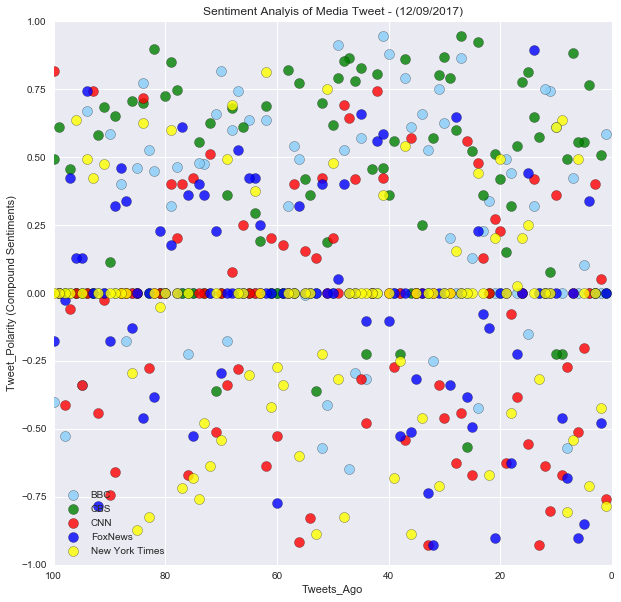

In [10]:
# Plot 2 graphs required

# Graph 1 - Tweets Ago vs. Tweet Polarity (Compound Sentiments)
# plot all 5 news graphs onto 1 graph

plt.figure(figsize=(10,10))

BBC = plt.scatter(BBC_graph['Tweets_Ago'],BBC_graph['Compound'], c='lightskyblue', s=100, 
                  edgecolors='Black', alpha = 0.8, label='BBC')

CBS = plt.scatter(CBS_graph['Tweets_Ago'],CBS_graph['Compound'], c='green', s=100, 
                  edgecolors='Black', alpha = 0.8, label='CBS')

CNN = plt.scatter(CNN_graph['Tweets_Ago'],CNN_graph['Compound'], c='red', s=100, 
                  edgecolors='Black', alpha = 0.8, label='CNN')

FoxNews = plt.scatter(FoxNews_graph['Tweets_Ago'],FoxNews_graph['Compound'], c='blue', s=100, 
                      edgecolors='Black', alpha = 0.8, label='FoxNews')

nytimes = plt.scatter(nytimes_graph['Tweets_Ago'],nytimes_graph['Compound'], c='yellow', s=100, 
                      edgecolors='Black', alpha = 0.8, label='New York Times')

plt.ylim(-1, 1)
plt.xlim(100, 0)

plt.xlabel("Tweets_Ago")
plt.ylabel("Tweet_Polarity (Compound Sentiments)")

plt.legend()

# Prints our scatter plot graph to the screen
plt.title("Sentiment Analyis of Media Tweet - (12/09/2017)")
plt.show()


In [11]:
# Group compound sentiments by news and calculate average to graph
# Put into a dataframe
News_graph = news_sentiment_data.groupby(['Source'])['Compound'].mean()
News_graph = pd.DataFrame(News_graph)
News_graph


,Compound
Source,
@BBC,0.195754
@CBS,0.367527
@CNN,-0.065402
@FoxNews,-0.014422
@nytimes,-0.064578


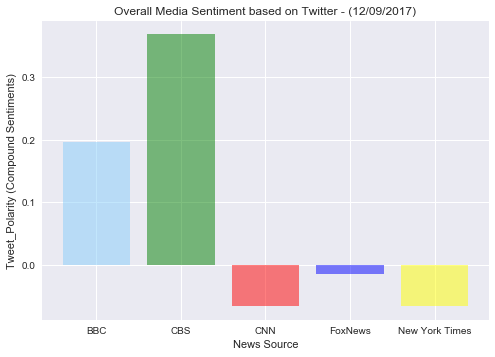

In [13]:
# Graph 2 - News Source vs. Tweet Polarity (Compound Sentiments)
 
News = ['BBC', 'CBS', 'CNN', 'FoxNews', 'New York Times']
colors = ['lightskyblue', 'green', 'red', 'blue', 'yellow']
Tweet_Polarity = News_graph['Compound']
ypos = np.arange(len(News))
plt.xticks(ypos,News)

plt.bar(ypos, Tweet_Polarity, align='center', alpha=0.5, color = colors)
 
# Label x and y axis
plt.xlabel("News Source")
plt.ylabel("Tweet_Polarity (Compound Sentiments)")

# Prints our bar graph to the screen
plt.title("Overall Media Sentiment based on Twitter - (12/09/2017)")
plt.show()
